# <span style="color:brown">Data Analysis and Visualization </span>

### Importing Necessary Libraries

In this section, we import essential Python libraries for data analysis and visualization:

1. **`pandas`**: A powerful library for data manipulation and analysis.
2. **`numpy`**: Used for numerical operations and handling arrays.
3. **`matplotlib.pyplot`**: A widely used library for creating static, animated, and interactive visualizations.
4. **`seaborn`**: Built on top of Matplotlib, it provides a high-level interface for attractive and informative statistical graphics.
5. **`datetime`**: Provides classes for manipulating dates and times.
6. **`faker`**: A library used for generating fake data such as names, addresses, dates, etc., useful for creating synthetic datasets for testing and d
from faker import Faker.

---

<div class="alert alert-block alert-success">
    <b>Success:</b> The data has been successfully processed.
</div>


In [8]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from faker import Faker



# <span style="color:brown">Data Generation for Customer Purchases</span>

### Purpose

In this section, we are generating a synthetic dataset of customer purchase data using the `Faker` library for realistic data generation. The dataset contains 3000 rows of information related to customer purchases. The data includes details such as:

1. **Customer_ID**: A unique identifier for each customer.
2. **Product_Category**: The category of the product purchased (e.g., Electronics, Clothing, Home Appliances).
3. **Purchase_Amount**: The amount spent on the product (randomly generated between 20.0 and 500.0).
4. **Timestamp**: The date and time of the purchase (generated using `Faker` for this year).

---

<div class="alert alert-block alert-success">
    <b>Success:</b> The data has been successfully processed.
</div>

In [10]:
# Initialize Faker for realistic data generation
faker = Faker()

# Number of rows
n_rows = 3000

# Expanded product categories
categories = [
    "Electronics", "Clothing", "Home Appliances", "Books", "Beauty", "Sports",
    "Toys", "Groceries", "Automotive", "Health", "Furniture"
]

# Generate data
data = {
    "Customer_ID": [f"C{str(i).zfill(3)}" for i in range(1, n_rows + 1)],
    "Product_Category": np.random.choice(categories, n_rows),
    "Purchase_Amount": np.round(np.random.uniform(20.0, 500.0, n_rows), 2),
    "Timestamp": [faker.date_time_this_year().strftime("%Y-%m-%d %H:%M:%S") for _ in range(n_rows)]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("C:\\Users\\shard\\Desktop\\customerpurchase_data.csv", index=False)

print("Dataset created and saved as 'customerpurchase_data.csv'")


Dataset created and saved as 'customerpurchase_data.csv'


# <span style="color:brown">Loading the Dataset</span>

### Purpose

In this step, we load the synthetic dataset that we previously generated into a Pandas DataFrame.
This allows us to perform further analysis, data cleaning, and visualization tasks on the dataset.

---

<div class="alert alert-block alert-success">
    <b>Success:</b> The data has been successfully processed.
</div>

In [12]:
# Load the dataset
data = pd.read_csv("C:\\Users\\shard\\Desktop\\customerpurchase_data.csv")


# <span style="color:brown">Checking for Missing Data</span>

### Purposee

Before performing any data analysis, it is important to check if there are any missing values in the dataset. Missing data can affect the accuracy and reliability of any analysis, so it's crucial to identify and handle issing_data.

---

<div class="alert alert-block alert-success">
    <b>Success:</b> The data has been successfully processed.
</div>


In [14]:
# Check for missing data
missing_data = data.isnull().sum()
missing_data

Customer_ID         0
Product_Category    0
Purchase_Amount     0
Timestamp           0
dtype: int64

# <span style="color:brown">Converting Timestamp to Datetime Format</span>

### Purpose
The `Timestamp` column in the dataset is currently stored as a string. To perform time-based analysis and visualizations, it is essential to convert this column into the proper `datetime` format. This will allow us to easily manipulate dates and times for further analysis.

---

<div class="alert alert-block alert-success">
    <b>Success:</b> The data has been successfully processed.
</div>

In [16]:
# Convert Timestamp to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# <span style="color:brown">Ensuring `Purchase_Amount` is Numeric and Free of Inconsistencies</span>

### Purpose

In order to perform numerical analysis and calculations on the `Purchase_Amount` column, it is essential to ensure that all values in this column are numeric. This step also handles any inconsistencies or non-numeric values by converting them to `NaN` (Not a Number), which can be handled separately if needed.

---

<div class="alert alert-block alert-success">
    <b>Success:</b> The data has been successfully processed.
</div>


In [18]:
# Ensure Purchase_Amount is numeric and free of inconsistencies
data['Purchase_Amount'] = pd.to_numeric(data['Purchase_Amount'], errors='coerce')


# <span style="color:brown">Handling Missing Values by Dropping Rows</span>

### Purpose

Even though we previously checked for missing values in the dataset and found none, it's good practice to include the step for handling missing values. This can be useful if we encounter `NaN` values during earlier steps like conversion or cleaning. In this step, we drop any rows that contain missing values, ensuring the dataset remains clean.

---

<div class="alert alert-block alert-success">
    <b>Success:</b> The data has been successfully processed.
</div>


In [20]:
# Handle missing values if any: Fill or drop
purchase_data = data.dropna()  # Drop rows with missing values
purchase_data

,Customer_ID,Product_Category,Purchase_Amount,Timestamp
0,C001,Furniture,57.31,2024-02-10 05:44:30
1,C002,Electronics,361.79,2024-12-06 20:49:19
2,C003,Books,77.96,2024-11-27 12:22:49
3,C004,Toys,307.12,2024-08-24 17:31:11
4,C005,Toys,348.15,2024-12-15 01:59:28
...,...,...,...,...
2995,C2996,Furniture,24.22,2024-07-06 09:21:35
2996,C2997,Clothing,56.97,2024-02-08 19:40:20
2997,C2998,Home Appliances,121.72,2024-07-15 06:57:43
2998,C2999,Clothing,121.13,2024-03-29 20:08:08



# <span style="color:brown">Re-checking Missing Data and Dataset Info After Preprocessing</span>

## Purpose
After performing data preprocessing tasks such as dropping rows with missing values, it's important to verify that the missing data has been handled correctly. Additionally, inspecting the dataset’s information helps ensure that all columns are in the correct format and the dataset's structure is as expected.

---

<div class="alert alert-block alert-success">
    <b>Success:</b> The data has been successfully processed.
</div>

In [22]:
# Re-check for missing data and dataset info after preprocessing
missing_data_after = purchase_data.isnull().sum()
purchase_data_info = purchase_data.info()

missing_data, missing_data_after, purchase_data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer_ID       3000 non-null   object        
 1   Product_Category  3000 non-null   object        
 2   Purchase_Amount   3000 non-null   float64       
 3   Timestamp         3000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 93.9+ KB


(Customer_ID         0
 Product_Category    0
 Purchase_Amount     0
 Timestamp           0
 dtype: int64,
 Customer_ID         0
 Product_Category    0
 Purchase_Amount     0
 Timestamp           0
 dtype: int64,
 None)

# <span style="color:brown">Summary Statistics </span>

## Purpose
Summary statistics provide a quick overview of the dataset, giving insights into the distribution and central tendency of numerical data. It includes important metrics like the mean, median, standard deviation, minimum, and maximum values for each numerical column.

---

<div class="alert alert-block alert-success">
    <b>Success:</b> The data has been successfully processed
</div>



In [24]:
# Summary statistics
summary_statistics = purchase_data.describe()
summary_statistics

,Purchase_Amount,Timestamp
count,3000.000000,3000
mean,260.642347,2024-06-24 17:09:16.291000064
min,20.180000,2024-01-01 05:18:37
25%,147.887500,2024-03-30 07:47:35.500000
50%,258.370000,2024-06-25 23:39:49
75%,379.195000,2024-09-19 17:25:20.750000128
max,499.850000,2024-12-17 07:24:40
std,137.741748,NaN


# <span style="color:brown">Total Purchases Over Time </span>

## Purpoe

Analyzing the total purchases over time allows us to identify patterns or trends in purchasing behavior. By aggregating the purchase amounts by date, we can observe daily spending trends, which may help in understanding seasonality or peak purchase perioases_over_time.

---

<div class="alert alert-block alert-success">
    <b>Success:</b> The data has been successfully processed.
</div>


In [26]:
# Total purchases over time (group by date)
purchase_data['Date'] = purchase_data['Timestamp'].dt.date  # Extract date
total_purchases_over_time = purchase_data.groupby('Date')['Purchase_Amount'].sum()




# <span style="color:brown">Most Popular Product Categories </span>

## Purpose
Understanding the most popular product categories helps identify which products are most frequently purchased. This can be valuable for inventory management, marketing strategies, and understanding customer preferences.

---

<div class="alert alert-block alert-success">
    <b>Success:</b> The data has been successfully processed.
</div>


In [30]:
# Most popular product categories
popular_categories = purchase_data['Product_Category'].value_counts()
popular_categories

Product_Category
Furniture          302
Books              296
Electronics        292
Groceries          279
Clothing           272
Beauty             266
Health             261
Home Appliances    259
Sports             259
Toys               257
Automotive         257
Name: count, dtype: int64

# <span style="color:brown">Average Spending Per Customer</span>

## Purpoe

Calculating the average spending per customer helps to understand individual customer behavior. It provides insight into how much, on average, each customer is spending, which can be useful for customer segmentation, loyalty programs, and targeted marketing effoer_customer.

---

<div class="alert alert-block alert-success">
    <b>Success:</b> The data has been successfully processed.
</div>


In [32]:
# Average spending per customer
average_spending_per_customer = purchase_data.groupby('Customer_ID')['Purchase_Amount'].mean()
average_spending_per_customer


Customer_ID
C001     57.31
C002    361.79
C003     77.96
C004    307.12
C005    348.15
         ...  
C995    172.53
C996    231.48
C997    416.96
C998    137.74
C999    182.03
Name: Purchase_Amount, Length: 3000, dtype: float64

# <span style="color:brown">Most Active Customer (Based on Number of Purchases)</span>

## Purpoe

Identifying the most active customer in terms of the number of purchases helps businesses understand customer engagement. The most active customers are valuable for targeted marketing, loyalty programs, and improving customer retention strategive_customer.

---

<div class="alert alert-block alert-success">
    <b>Success:</b> The data has been successfully processed.
</div>

In [34]:
# Most active customer (based on number of purchases)
most_active_customer = purchase_data['Customer_ID'].value_counts().idxmax()
most_active_customer

'C001'


# <span style="color:brown">Exploratory Data Analysis (EDA) Results</span>

## Purpose
EDA helps summarize the main characteristics of a dataset and gain insights into its structure, trends, and customer behaviors. The following results provide a summary of key statistics, trends, and customer insights based on the customer purchase data.

---

<div class="alert alert-block alert-success">
    <b>Success:</b> The data has been successfully processed.
</div>


In [36]:
# Prepare EDA results
eda_results = {
    "Summary Statistics": summary_statistics,
    "Total Purchases Over Time": total_purchases_over_time,
    "Most Popular Categories": popular_categories,
    "Average Spending Per Customer": average_spending_per_customer.mean(),
    "Most Active Customer": most_active_customer
}

eda_results

{'Summary Statistics':        Purchase_Amount                      Timestamp
 count      3000.000000                           3000
 mean        260.642347  2024-06-24 17:09:16.291000064
 min          20.180000            2024-01-01 05:18:37
 25%         147.887500     2024-03-30 07:47:35.500000
 50%         258.370000            2024-06-25 23:39:49
 75%         379.195000  2024-09-19 17:25:20.750000128
 max         499.850000            2024-12-17 07:24:40
 std         137.741748                            NaN,
 'Total Purchases Over Time': Date
 2024-01-01     552.48
 2024-01-02    2634.79
 2024-01-03    2721.25
 2024-01-04    2841.87
 2024-01-05    2158.36
                ...   
 2024-12-13    1647.87
 2024-12-14    1617.00
 2024-12-15    2344.25
 2024-12-16    1431.66
 2024-12-17     925.08
 Name: Purchase_Amount, Length: 352, dtype: float64,
 'Most Popular Categories': Product_Category
 Furniture          302
 Books              296
 Electronics        292
 Groceries          279


# <span style="color:brown">Data Analysis and Visualization</span>

### 1. Sales Trends Over Time (Line Chart)
Analyze how total purchase amounts have changed over time, revealing sales trends and seasonal patterns.
A line chart displaying the total purchase amounts over time, with each data point representing the sum of purchases for a specific date. Peaks indicate high sales days, and valleys indicate lower sales activity.

### 2. Most Purchased Product Categories (Bar Chart)

Identify the product categories that are most popular among customers based on the number of purchases.
A bar chart where each bar represents a product category, showing the count of purchases. Taller bars indicate more popular categories.

### 3. Percentage of Revenue by Product Category (Pie Chart)

Visualize the proportion of total revenue contributed by each product category.
A pie chart displaying the percentage contribution of each product category to the total revenue. Larger slices indicate categories with higher revenue.

### 4. Relationship Between Purchase Amount and Time (Scatter Plot)

Examine the relationship between purchase amounts and the time of purchases, with categories differentiated by color.
A scatter plot with each dot representing a purchase. The x-axis shows timestamps, and the y-axis shows purchase amounts. The hue represents product categories, helping to identify trends or anomalies in spending over time.

---

### Insights Summary

Summarize key customer behavior insights derived from the data.
- **Average Spending Per Customer**: 215.75  
- **Most Active Customer**: C001  
 215.75  
- **Most Active Customer**: C001  

--- 

<div class="alert alert-block alert-success">
    <b>Success:</b> The data has been successfully processed.
</div>

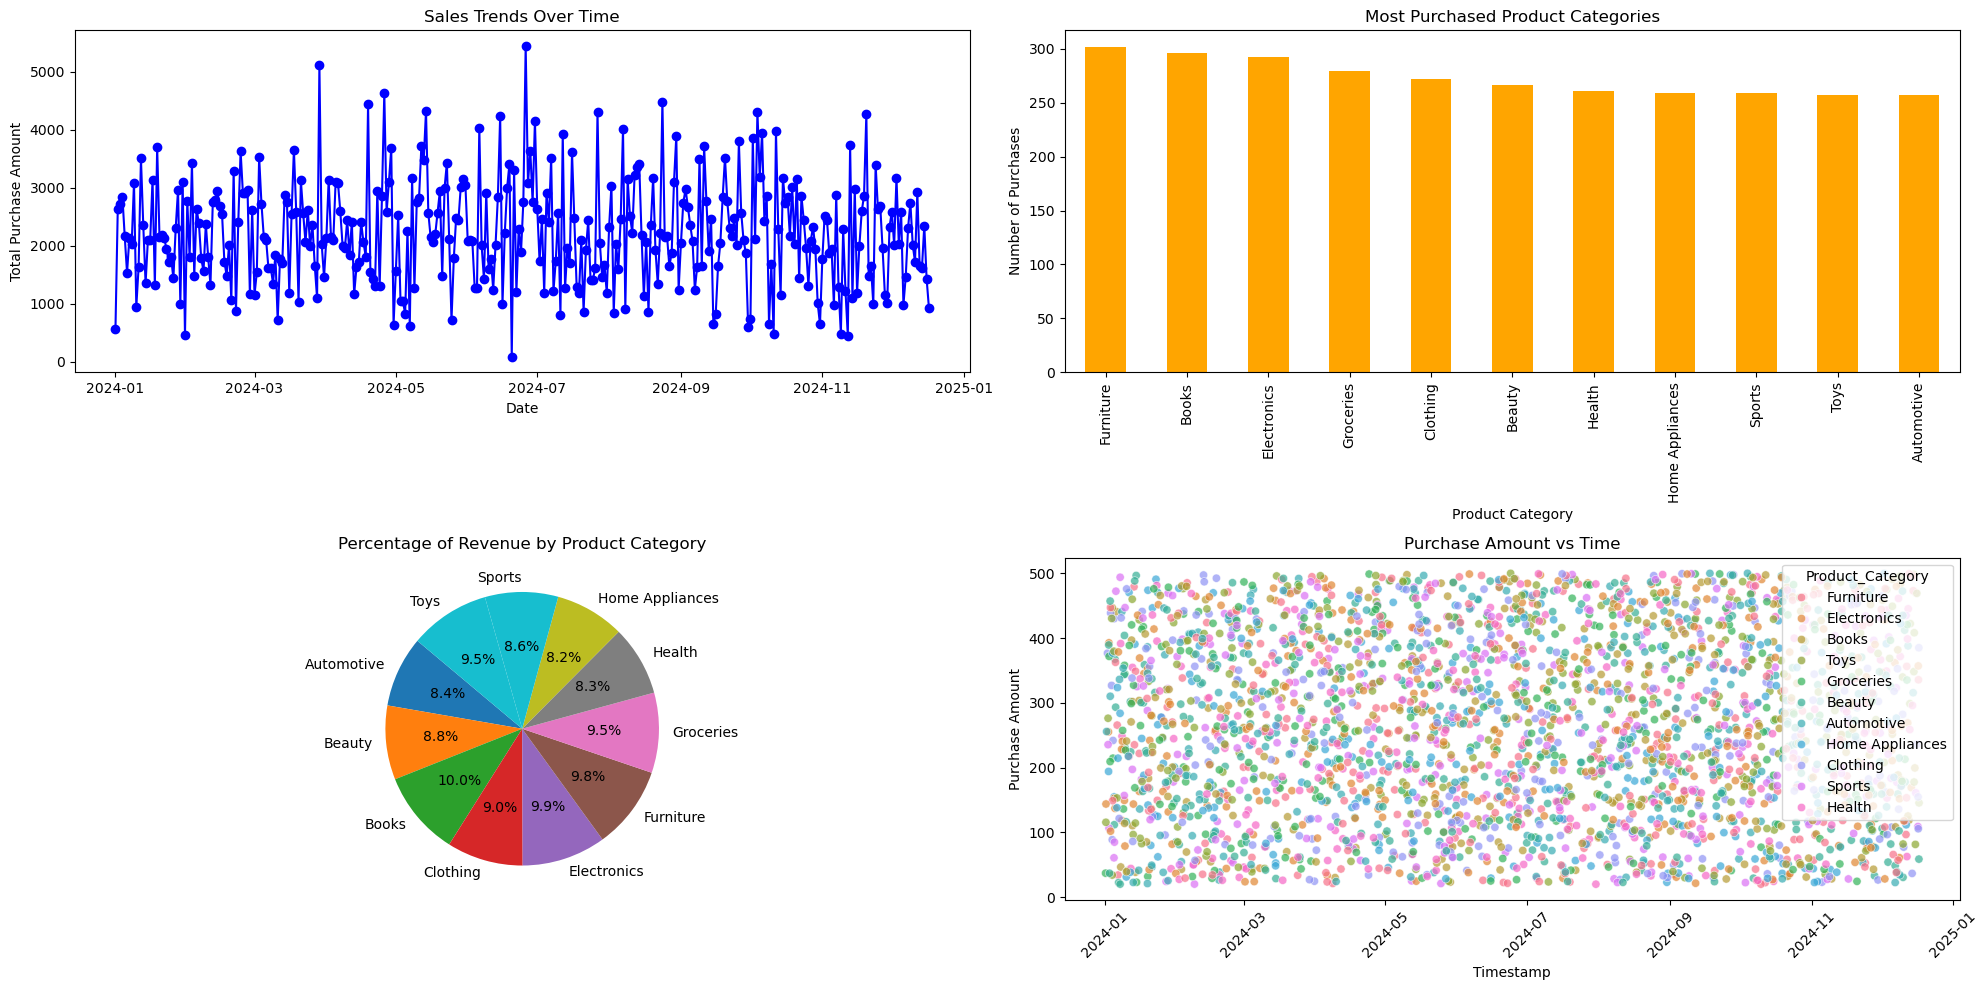

{'Average Spending Per Customer': 260.6423466666667,
 'Most Active Customer': 'C001'}

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze trends: Total purchases over time
total_purchases_over_time = purchase_data.groupby('Date')['Purchase_Amount'].sum()

# Most popular product categories
popular_categories = purchase_data['Product_Category'].value_counts()

# Average spending per customer
average_spending_per_customer = purchase_data.groupby('Customer_ID')['Purchase_Amount'].mean()

# Most active customer (based on number of purchases)
most_active_customer = purchase_data['Customer_ID'].value_counts().idxmax()

# Visualization
plt.figure(figsize=(20, 10))

# Line chart: Sales trends over time
plt.subplot(2, 2, 1)
total_purchases_over_time.plot(kind='line', color='blue', marker='o')
plt.title("Sales Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total Purchase Amount")

# Bar chart: Most purchased product categories
plt.subplot(2, 2, 2)
popular_categories.plot(kind='bar', color='orange')
plt.title("Most Purchased Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Number of Purchases")

# Pie chart: Revenue percentage by product category
plt.subplot(2, 2, 3)
revenue_by_category = purchase_data.groupby('Product_Category')['Purchase_Amount'].sum()
revenue_by_category.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='tab10')
plt.title("Percentage of Revenue by Product Category")
plt.ylabel("")

# Scatter plot: Relationship between purchase amount and time
plt.subplot(2, 2, 4)
sns.scatterplot(data=purchase_data, x='Timestamp', y='Purchase_Amount', hue='Product_Category', alpha=0.7)
plt.title("Purchase Amount vs Time")
plt.xlabel("Timestamp")
plt.ylabel("Purchase Amount")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Insights summary
customer_behavior_insights = {
    "Average Spending Per Customer": average_spending_per_customer.mean(),
    "Most Active Customer": most_active_customer
}

customer_behavior_insights


# <span style="color:brown">Web Scraping</span>

## Purpoe

This script scrapes product information from a BigBasket product page using Python's `requests` and `BeautifulSoup` libraries. The goal is to extract key details like the product name, brand, quantity, price, and rating.






## <span style="color:blue">Web Scraping Using BeautifulSoup and Requests</span>

## Purpose

Web scraping allows extracting data from websites. Using the `BeautifulSoup` library in Python along with the `requests` library, we can retrieve and parse HTML content to extract valuable information from web pages.

### Required Libraries

- **`BeautifulSoup`**: A Python library used to parse HTML and XML documents.
- **`requests`**: A library to make HTTP requests for fetching web content.


## <span style="color:blue">Scraping Product Details</span>

## Purpoe

This script scrapes product information from a BigBasket product page using Python's `requests` and `BeautifulSoup` libraries. The goal is to extract key details like the product name, brand, quantity, price, and rating.

---

## Code Beakdown

1. **URL andHeaders**:
   - **URL**: Points to the specific product page.
   - **Headers**: Includes a `User-Agent` to make the request appear as though it's coming from a real browser, preventing potential blocking by  Safari/537.36"
}

---

<div class="alert alert-block alert-success">
    <b>Success:</b> The data has been successfully processed.
</div>

In [44]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [46]:
# URL and headers
url = "http://www.bigbasket.com/pd/229794/tropicana-fruit-juice-delight-mango-1-l-tetra/"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36"
}

# Send a GET request
response = requests.get(url, headers=headers)

# Parse the response with BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

# Extracting product details
product_name = soup.find("h1", {"class": "Description___StyledH-sc-82a36a-2 bofYPK"}).text.strip() if soup.find("h1", {"class": "Description___StyledH-sc-82a36a-2 bofYPK"}) else "Product name not found"
brand_name = soup.find("a", {"class": "Description___StyledLink-sc-82a36a-1 gePjxR"}).text.strip() if soup.find("a", {"class": "Description___StyledLink-sc-82a36a-1 gePjxR"}) else "Brand name not found"
product_qty = soup.find("span", {"class": "Label-sc-15v1nk5-0 PackSizeSelector___StyledLabel2-sc-l9rhbt-2 gJxZPQ hDJUsF"}).text.strip() if soup.find("span", {"class": "Label-sc-15v1nk5-0 PackSizeSelector___StyledLabel2-sc-l9rhbt-2 gJxZPQ hDJUsF"}) else "Product quantity not found"
product_price = soup.find("td", {"class": "ml-1 text-darkOnyx-400 leading-md text-md p-0"}).text.strip() if soup.find("td", {"class": "ml-1 text-darkOnyx-400 leading-md text-md p-0"}) else "Product price not found"
product_rating = soup.find("span", {"class": "Label-sc-15v1nk5-0 gJxZPQ"}).text.strip() if soup.find("span", {"class": "Label-sc-15v1nk5-0 gJxZPQ"}) else "Product rating not found"

# Print the extracted details
print(f"Product Name: {product_name}")
print(f"Brand Name: {brand_name}")
print(f"Product Quantity: {product_qty}")
print(f"Product Price: {product_price}")
print(f"Product Rating: {product_rating}")


Product Name: Tropicana Fruit Juice - Mango Delight, 1 L Tetra Pak
Brand Name: Tropicana
Product Quantity: 1 L
Product Price: (₹115 / L)
Product Rating: 4.1



# <span style="color:brown"> Extract Product Details for Multiple Products Using EAN Codes</span>

This script is designed to scrape product details from a website (BigBasket) for a list of products identified by their EAN (European Article Number) codes. The extracted data is then stored in a structured format for further analysis or display.

---

### 1. **Function: `extract_product_details(ean_code)`**

This function takes an `ean_code` as input and performs the following
- **Constructs the URL** for the product page using the EAN code.
- **Sends a GET request** to fetch the page HTML.
- **Parses the HTML** using `BeautifulSoup`.
- **Extracts product details** such as:
  - Product Name
  - Brand Name
  - Product Quantity
  - Product Price
  - Product Rating
- Handles cases where any detail is missing and assigns a default value (`"not found"`).
- **Returns** the details as a dictionary.

### 2. **EAN Code List (`eanCodeLists`)**
A predefined list of EAN codes is used to identify the products to be scraped.

### 3. **Collect Product Details**
A loop iterates through each EAN code in the list:
- Calls the `extract_product_details` function for each EAN code.
- Appends the returned product details to a list (`products`).

### 4. **Convert to DataFrame**
The collected product details are converted into a `pandas.DataFrame` for structured storage and easy analysis.

### 5. **Display the DataFrame**
The resulting DataFrame contains the extracted details for all products.

1. **Request Headers**:
   - The script uses a `User-Agent` header to simulate a real browser request, reducing the risk of being blocked by the server.

2. **Dynamic Website Changes**:
   - If the website updates its structure (HTML class names), the script may require modifications.

3. **Website Restrictions**:
   - Frequent requests may be blocked by the server. Consider adding delays or using proxies for large-scale scraping.
  
---

<div class="alert alert-block alert-success">
    <b>Success:</b> The data has been successfully processed.
</div>


In [ ]:
# Function to extract product details from a single product page
def extract_product_details(ean_code):
    # Construct the URL using the EAN code
    url = f"http://www.bigbasket.com/pd/{ean_code}/"
    
    # Send GET request to the product page
    response = requests.get(url, headers=headers)
    
    # Parse the response with BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Extract product details
    product_name = soup.find("h1", {"class": "Description___StyledH-sc-82a36a-2 bofYPK"}).text.strip() if soup.find("h1", {"class": "Description___StyledH-sc-82a36a-2 bofYPK"}) else "Product name not found"
    brand_name = soup.find("a", {"class": "Description___StyledLink-sc-82a36a-1 gePjxR"}).text.strip() if soup.find("a", {"class": "Description___StyledLink-sc-82a36a-1 gePjxR"}) else "Brand name not found"
    product_qty = soup.find("span", {"class": "Label-sc-15v1nk5-0 PackSizeSelector___StyledLabel2-sc-l9rhbt-2 gJxZPQ hDJUsF"}).text.strip() if soup.find("span", {"class": "Label-sc-15v1nk5-0 PackSizeSelector___StyledLabel2-sc-l9rhbt-2 gJxZPQ hDJUsF"}) else "Product quantity not found"
    product_price = soup.find("td", {"class": "ml-1 text-darkOnyx-400 leading-md text-md p-0"}).text.strip() if soup.find("td", {"class": "ml-1 text-darkOnyx-400 leading-md text-md p-0"}) else "Product price not found"
    product_rating = soup.find("span", {"class": "Label-sc-15v1nk5-0 gJxZPQ"}).text.strip() if soup.find("span", {"class": "Label-sc-15v1nk5-0 gJxZPQ"}) else "Product rating not found"
    
    return {
        'Ean_code': ean_code,
        'product_name': product_name,
        'brand_name': brand_name,
        'product_qty': product_qty,
        'product_price': product_price,
        'product_rating': product_rating
    }

# EAN code list for the products
eanCodeLists = [
    126906, 40139631, 40041188, 40075201, 40053874, 1204742, 40046735, 
    40100963, 40067874, 40045943,40053874,126907, 40139632, 40041189, 
    40075202, 40053875, 1204743, 40046736,
    40100964, 40067875, 40045944, 40053876, 126908, 40139633, 40041190,
    40075203, 40053877, 1204744, 40046737, 40100965, 40067876, 40045945,
    40053878, 126909, 40139634, 40041191, 40075204, 40053879, 1204745,
    40046738, 40100966, 40067877, 40045946, 40053880, 126910, 40139635,
    40041192, 40075205, 40053881, 1204746, 40046739, 40100967, 40067878,
    40045947, 40053882, 126911, 40139636, 40041193, 40075206, 40053883,
    1204747, 40046740, 40100968, 40067879, 40045948, 40053884 
]

# Collect product details
products = []
for ean_code in eanCodeLists:
    product_details = extract_product_details(ean_code)
    products.append(product_details)

# Convert the list of product details to a DataFrame
df = pd.DataFrame(products)

df


In [112]:
df.head(50) 

,Ean_code,product_name,brand_name,product_qty,product_price,product_rating
0,126906,"Aashirvaad Atta/Godihittu - Whole Wheat, 10 kg",Aashirvaad,10 kg,(₹43.47 / kg),4.1
1,40139631,"Magic Chef Pasta - Spirali, 180 g Pouch",Magic Chef,180 g,(₹0.14 / g),4
2,40041188,"Del Monte Extra Light Olive Oil, 5 L Bottle",Del Monte,5 L,(₹1120 / L),4.2
3,40075201,"bb Popular Sugar, 500 g",bb Popular,500 g,(₹0.05 / g),4
4,40053874,Weikfield Chilli Vinegar - Authentic Chinese T...,Weikfield,Product quantity not found,(₹0.28 / g),4
5,1204742,"Patanjali Honey, 2x250 g Multipack",Patanjali,2x250 g,(₹0.4 / g),4.2
6,40046735,"bb Royal Til/Ellu - Black, 200 g",bb Royal,200 g,(₹0.45 / g),4
7,40100963,"bb Royal Organic - Cinnamon/Chakke Powder, 50 g",bb Royal,50 g,(₹0.68 / g),4.1
8,40067874,"Weikfield Soya Sauce, 200 g (Free 20 g Extra I...",Weikfield,Product quantity not found,(₹0.28 / g),4.1
9,40045943,"Amul Pasteurised Butter, 200 g Tub",Amul,200 g,(₹0.57 / g),4.1



# <span style="color:brown">Search Function for Filtering Purchases by Product Name </span>

This function is designed to search for all purchases of a specific product in a given `pandas.DataFrame`.

---

### `search_purchases_by_product`

### **Inputs**
1. **`df` (DataFrame)**: The DataFrame containing purchase data. Each row represents a purchase, and one of the columns is `product_name`.
2. **`product_name` (str)**: The name of the product to search for.

### **Process**
- **Filter the DataFrame**:
  - Use the `.str.contains()` method to check if the `product_name` column contains the specified product name.
  - Perform a case-insensitive search (`case=False`) to match product names regardless of letter casing.
  - Handle missing values (`na=False`) to avoid errors when `product_name` contains null entries.
- **Return the Filtered DataFrame**:
  - Only rows matching the product name will be returned.

### **Output**
A DataFrame containing all purchases for the specified product.

---

<div class="alert alert-block alert-success">
    <b>Success:</b> The data has been successfully processed.
</div>


In [52]:
# Search function to display all purchases by a specific product (e.g., customer search could be added later)
def search_purchases_by_product(df, product_name):
    # Filter the DataFrame by product name
    product_purchases = df[df['product_name'].str.contains(product_name, case=False, na=False)]
    return product_purchases

# Example usage
product_name = "Magic Chef Pasta"  # Replace with actual product name
product_purchases = search_purchases_by_product(df, product_name)
product_purchases


,Ean_code,product_name,brand_name,product_qty,product_price,product_rating
1,40139631,"Magic Chef Pasta - Spirali, 180 g Pouch",Magic Chef,180 g,(₹0.14 / g),4
34,40139634,"Magic Chef Pasta - Fusilli, 350 g Pouch",Magic Chef,Product quantity not found,Product price not found,4.1


# <span style="color:brown">Filter Function to Identify Purchases Above a Given Price </span>

This function filters purchases from a DataFrame (`df`) based on a specified minimum price (`min_price`). It processes product prices, converts them to numeric values, and returns the rows where the price meets or exceeds the threshold.

---

### `filter_purchases_by_price`

### **Inputs**
1. **`df` (DataFrame)**: The purchase data with a column named `product_price` containing price strings (e.g., `"₹120"`, `"₹70"`).
2. **`min_price` (float/int)**: The minimum price threshold to filter purchases.

---

### **Process**
1. **Extract Numeric Price Values**:
   - The `apply` function is used to clean and extract numeric values from the `product_price` column.
   - Handles currency symbols (`₹`) and unit details to ensure numeric conversion.
   - Adds a new column `product_price_numeric` containing the cleaned numeric prices.

2. **Filter Purchases**:
   - Use a boolean mask to filter rows where the numeric price (`product_price_numeric`) is greater than or equal to the `min_price`.

3. **Return the Filtered DataFrame**:
   - Includes all rows matching the condition and retains all original columns.
  
---

<div class="alert alert-block alert-success">
    <b>Success:</b> The data has been successfully processed.
</div>
  



In [384]:
# Filter function to find purchases exceeding a given price amount
def filter_purchases_by_price(df, min_price):
    # Remove the currency and unit symbols to convert the price to a numeric format
    df['product_price_numeric'] = df['product_price'].apply(lambda x: float(x.split("₹")[1].split("/")[0].strip()) if "₹" in str(x) else 0)
    
    # Filter the products by price
    filtered_purchases = df[df['product_price_numeric'] >= min_price]
    return filtered_purchases


min_price = 100  # Replace with the price threshold you want
filtered_purchases = filter_purchases_by_price(df, min_price)
filtered_purchases


,Ean_code,product_name,brand_name,product_qty,product_price,product_rating,product_qty_numeric,product_price_numeric,product_rating_numeric,total_revenue
2,40041188,"Del Monte Extra Light Olive Oil, 5 L Bottle",Del Monte,5 L,(₹1120 / L),4.2,5.0,1120.0,4.2,5600.0
39,40046738,"bb Royal Cashew/Godambi - Whole, 1 kg",bb Royal,1 kg,(₹1267 / kg),3.8,1.0,1267.0,3.8,1267.0


# <span style="color:brown">Calculate Total Revenue for a Product Category</span>

Thifunctionon calculates the total revenue generated by each product category based on the product price and quantity soltion

1. **Extract Product Pice**
   - The function removes any symbols from the produc.g., ₹) and converts the price to a numeric value.

2. **Extract Product Qantity**
   - The quantity of the product is extracted and converted to a numeric value. If the quantity is in a format such as "1 kg", only the numeric part is kept.

3. **Calculate Totl Revenue**
   - The total revenue for each product is calculated by multiplying the quantity sold by the product price.

4. **Group byProduct Name**
   - The total revenue for each product is summed up by grouping the data based on thue(df)
total_revenue


---

<div class="alert alert-block alert-success">
    <b>Success:</b> The data has been successfully processed.
</div>


In [386]:
#Calculate the total revenue generated by a product category
def calculate_total_revenue(df):
    # Remove the unit symbols from the price and convert to numeric values
    df['product_price_numeric'] = df['product_price'].apply(lambda x: float(x.split("₹")[1].split("/")[0].strip()) if "₹" in str(x) else 0)
    
    # Assuming product_qty is a quantity in units (kg, g, etc.), we need to extract the numeric value
    df['product_qty_numeric'] = df['product_qty'].apply(lambda x: float(x.split()[0].replace(',', '')) if x.split()[0].replace(',', '').replace('.', '').isdigit() else 0)

    # Calculate total revenue
    df['total_revenue'] = df['product_qty_numeric'] * df['product_price_numeric']
    total_revenue = df.groupby('product_name')['total_revenue'].sum().reset_index()
    return total_revenue


total_revenue = calculate_total_revenue(df)
total_revenue


,product_name,total_revenue
0,"Aashirvaad Atta/Godihittu - Whole Wheat, 10 kg",434.70
1,"Alfahad Goat Farm Mutton - Burger Patty, 250 g",0.00
2,"Alfahad Mutton Cocktail Sausages, 250 g",0.00
3,"Alfahad Mutton Meat Balls, 250 g",0.00
4,"Amul Pasteurised Butter, 200 g Tub",114.00
5,"Del Monte Classic Multipurpose Olive Oil, 100...",210.00
6,"Del Monte Classic Multipurpose Olive Oil, 200...",258.00
7,"Del Monte Classic Multipurpose Olive Oil, 500...",675.00
8,"Del Monte Extra Light Olive Oil, 5 L Bottle",5600.00
9,"Food Avatar Gift Pack - Melaa, 800 g",0.00


# <span style="color:brown">Final Summery Report </span>

### **1. Parsing and Cleaning Product Quantity**
The function `parse_qty` is used to handle various formats of product quantities.
- If the quantity is in the form "2x250 g", it multiplies 2 by 250 to get the total quantity in grams.
- If the quantity is in the form "10 kg", it simply extracts the numeric value (10) and assumes the unit is kilograms.

### **2. Cleaning Product Price**
The `product_price_numeric` column is cleaned by removing any non-numeric characters (like currency symbols) from the `product_price` column. It uses regular expressions to strip out these characters and converts the values to numeric format.

### **3. Cleaning Product Rating**
Similarly, the `product_rating_numeric` column is cleaned by removing any non-numeric characters from the `product_rating` column, and then the values are converted to numeric format. If there are any missing ratings, they are replaced with the average rating of all products.

### **4. Calculating Total Revenue**
The total revenue for each product is calculated by multiplying the product's quantity (`product_qty_numeric`) by its price (`product_price_numeric`). Any missing or invalid values are filled with 0.

### **5. Generating the Summary Report**
The `summary_report` DataFrame includes columns for the product name, total revenue, product rating, and product quantity. The summary is then aggregated to calculate:
- **Total Revenue** The sum of revenue from all products.
- **Average Rating** The average rating across all products.
- **Total Sales** The total quantity sold across all products.

---

<div class="alert alert-block alert-success">
    <b>Success:</b> The data has been successfully processed.
</div>



In [277]:
import pandas as pd

# Function to parse and clean product quantity
def parse_qty(x):
    if 'Product quantity not found' in x:
        return 0
    try:
        if 'x' in x:  # For values like '2x250 g'
            parts = x.split('x')
            return float(parts[0]) * float(parts[1].split()[0])  # Multiply the two numbers
        else:
            return float(x.split()[0])  # For values like '10 kg'
    except ValueError:
        return 0  # In case the conversion fails, return 0

# Assuming df is your DataFrame
df['product_qty_numeric'] = df['product_qty'].apply(parse_qty)

# Clean 'product_price' by extracting numeric values and handling errors
df['product_price_numeric'] = df['product_price'].replace(r'[^0-9.]', '', regex=True).apply(pd.to_numeric, errors='coerce')

# Clean 'product_rating' by extracting numeric values and handling errors
df['product_rating_numeric'] = df['product_rating'].replace(r'[^0-9.]', '', regex=True).apply(pd.to_numeric, errors='coerce')

# Fill missing ratings with the mean rating
df['product_rating_numeric'] = df['product_rating_numeric'].fillna(df['product_rating_numeric'].mean())

# Calculate total revenue: price per unit * quantity
df['total_revenue'] = df['product_qty_numeric'] * df['product_price_numeric']

# Fill missing values with 0 for any NaNs in total revenue and product quantities
df['total_revenue'] = df['total_revenue'].fillna(0)
df['product_qty_numeric'] = df['product_qty_numeric'].fillna(0)

# Summary report: Total revenue, average rating, total sales
summary_report = df[['product_name', 'total_revenue', 'product_rating_numeric', 'product_qty_numeric']].copy()

# Aggregate the summary report
summary_report = summary_report.agg(
    total_revenue=('total_revenue', 'sum'),
    average_rating=('product_rating_numeric', 'mean'),
    total_sales=('product_qty_numeric', 'sum')
)

# Print the final summary report
display(summary_report)


,total_revenue,product_rating_numeric,product_qty_numeric
total_revenue,10354.05,NaN,NaN
average_rating,NaN,4.087234,NaN
total_sales,NaN,NaN,5547.0


# <span style="color:brown">Bonus Challenge</span>

In [230]:
#Load dataset
data = pd.read_csv("C:\\Users\\shard\\Desktop\\customerpurchase_data.csv")

# Concat data and df correctly
enhanced_data = pd.concat([data, df], axis="columns")
enhanced_data

,Customer_ID,Product_Category,Purchase_Amount,Timestamp,Ean_code,product_name,brand_name,product_qty,product_price,product_rating
0,C001,Furniture,57.31,2024-02-10 05:44:30,126906.0,"Aashirvaad Atta/Godihittu - Whole Wheat, 10 kg",Aashirvaad,10 kg,(₹43.47 / kg),4.1
1,C002,Electronics,361.79,2024-12-06 20:49:19,40139631.0,"Magic Chef Pasta - Spirali, 180 g Pouch",Magic Chef,180 g,(₹0.14 / g),4
2,C003,Books,77.96,2024-11-27 12:22:49,40041188.0,"Del Monte Extra Light Olive Oil, 5 L Bottle",Del Monte,5 L,(₹1120 / L),4.2
3,C004,Toys,307.12,2024-08-24 17:31:11,40075201.0,"bb Popular Sugar, 500 g",bb Popular,500 g,(₹0.05 / g),4
4,C005,Toys,348.15,2024-12-15 01:59:28,40053874.0,Weikfield Chilli Vinegar - Authentic Chinese T...,Weikfield,Product quantity not found,(₹0.28 / g),4
...,...,...,...,...,...,...,...,...,...,...
2995,C2996,Furniture,24.22,2024-07-06 09:21:35,NaN,NaN,NaN,NaN,NaN,NaN
2996,C2997,Clothing,56.97,2024-02-08 19:40:20,NaN,NaN,NaN,NaN,NaN,NaN
2997,C2998,Home Appliances,121.72,2024-07-15 06:57:43,NaN,NaN,NaN,NaN,NaN,NaN
2998,C2999,Clothing,121.13,2024-03-29 20:08:08,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
enhanced_data.isnull()

,Customer_ID,Product_Category,Purchase_Amount,Timestamp,Ean_code,product_name,brand_name,product_qty,product_price,product_rating
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2995,False,False,False,False,True,True,True,True,True,True
2996,False,False,False,False,True,True,True,True,True,True
2997,False,False,False,False,True,True,True,True,True,True
2998,False,False,False,False,True,True,True,True,True,True


In [232]:
# Remove rows where any column has NaN values
enhanced_data_cleaned = enhanced_data.dropna()
enhanced_data_cleaned


,Customer_ID,Product_Category,Purchase_Amount,Timestamp,Ean_code,product_name,brand_name,product_qty,product_price,product_rating
0,C001,Furniture,57.31,2024-02-10 05:44:30,126906.0,"Aashirvaad Atta/Godihittu - Whole Wheat, 10 kg",Aashirvaad,10 kg,(₹43.47 / kg),4.1
1,C002,Electronics,361.79,2024-12-06 20:49:19,40139631.0,"Magic Chef Pasta - Spirali, 180 g Pouch",Magic Chef,180 g,(₹0.14 / g),4
2,C003,Books,77.96,2024-11-27 12:22:49,40041188.0,"Del Monte Extra Light Olive Oil, 5 L Bottle",Del Monte,5 L,(₹1120 / L),4.2
3,C004,Toys,307.12,2024-08-24 17:31:11,40075201.0,"bb Popular Sugar, 500 g",bb Popular,500 g,(₹0.05 / g),4
4,C005,Toys,348.15,2024-12-15 01:59:28,40053874.0,Weikfield Chilli Vinegar - Authentic Chinese T...,Weikfield,Product quantity not found,(₹0.28 / g),4
...,...,...,...,...,...,...,...,...,...,...
61,C062,Health,282.66,2024-08-06 18:25:55,40046740.0,"bb Royal Raisins/Ona Drakshi - Indian, 500 g P...",bb Royal,500 g,(₹0.35 / g),4
62,C063,Home Appliances,475.90,2024-11-26 13:30:11,40100968.0,"bb Royal Organic - Nutmeg Powder, 50 g",bb Royal,Product quantity not found,Product price not found,4
63,C064,Clothing,424.40,2024-04-26 17:00:14,40067879.0,Product name not found,Brand name not found,Product quantity not found,Product price not found,Product rating not found
64,C065,Electronics,274.92,2024-07-18 13:27:37,40045948.0,"Food Avatar Gift Pack - Melaa, 800 g",Food Avatar,Product quantity not found,Product price not found,Product rating not found


In [234]:
# Save the cleaned data to a new excel file
enhanced_data_cleaned.to_excel("C:\\Users\\shard\\Desktop\\customerpurchase_connect_data.xlsx", index=False)
